### GOLD PRICE PREDICTIONS

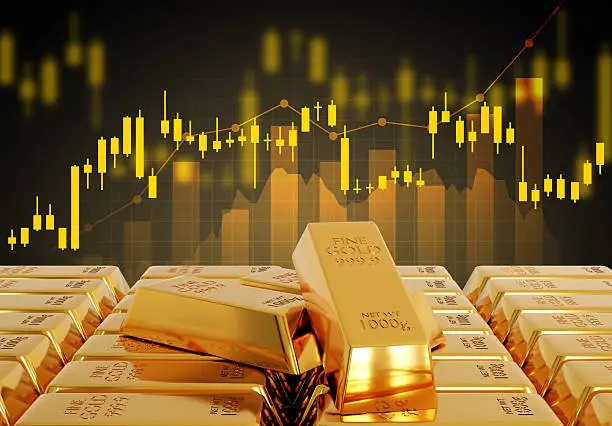

### 📌 Dataset Overview

The dataset contains historical financial market data used to analyze and predict gold prices. It includes macroeconomic indicators such as stock market index values, commodity prices, and currency exchange rates. The data is structured in a time-series format and is suitable for regression-based machine learning models.

Total Observations: 2290

Total Features: 6

Target Variable: GLD (Gold Price)

Data Type: Time-series numerical data

Missing Values: None

### Problem Statement

The objective of this project is to predict the price of gold (GLD) using key financial and economic indicators such as stock market performance, crude oil prices, silver prices, and currency exchange rates.

### Data Set Descriptions

##### 🗓 Date

•Represents the trading date

•Used for trend analysis and time-based modeling

##### 📈 SPX (S&P 500 Index)

•Indicates overall US stock market performance

•Reflects investor sentiment and market conditions


##### 🟨 GLD (Gold ETF Price) (Target Variable)

•Represents gold price movement

•Used as the prediction target in the model


##### 🛢 USO (Crude Oil ETF Price)

•Indicates crude oil price trends

•Acts as an inflation indicator affecting gold prices

##### 🥈 SLV (Silver ETF Price)

•Represents silver price movement

•Strongly correlated with gold prices


##### 💱 EUR/USD (Exchange Rate)

•Shows Euro to US Dollar exchange rate

•Currency fluctuations impact gold prices

##### 🎯 Target & Features Summary

•Target Variable: Gold Price (GLD)

•Independent Variables:
SPX, USO, SLV, EUR/USD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the csv data to a pandas dataframe
gold_data=pd.read_csv(r"C:\Users\56ash\OneDrive\Documents\Machine Learning Projects on Github\gold_price_data.csv")

In [3]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05/08/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05/09/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [7]:
# getting some basics informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
gold_data.duplicated().sum()

np.int64(0)

In [10]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


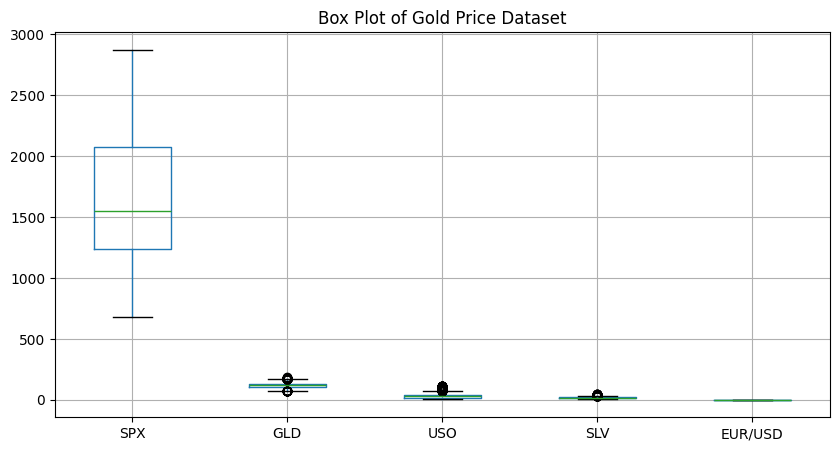

In [11]:
import matplotlib.pyplot as plt

gold_data.boxplot(figsize=(10,5))
plt.title("Box Plot of Gold Price Dataset")
plt.show()


Insights:

•USO (Crude Oil Price) shows the highest number of outliers, indicating strong price volatility and sudden market shocks.

•SPX (S&P 500 Index) has a wide spread, reflecting significant market fluctuations over time.

•GLD (Gold Price) displays fewer outliers, showing that gold is relatively more stable compared to oil and stock markets.

•SLV (Silver Price) has moderate variability and follows a pattern similar to gold.

•EUR/USD shows the least variability, indicating relatively stable currency movement.



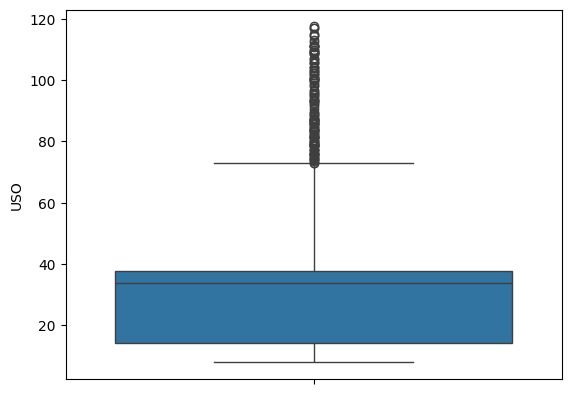

In [12]:
sns.boxplot(gold_data.USO)
plt.show()

Insights:

•The USO box plot shows a large number of outliers, indicating extreme price fluctuations in crude oil.

•The wide interquartile range (IQR) reflects high volatility compared to other features.

•Several values lie far above and below the whiskers, representing sudden oil price crashes and spikes.

•The median is closer to the lower quartile, showing a right-skewed distribution.

•These outliers are real market events, not data errors.


In [13]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

In [14]:
day=pd.to_datetime(gold_data.Date,format= "%y/%m/%d",errors='ignore').dt.day

In [15]:
day

0        2
1        3
2        4
3        7
4        8
        ..
2285     8
2286     9
2287    10
2288    14
2289    16
Name: Date, Length: 2290, dtype: int32

In [16]:
gold_data['day']=day

In [17]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,day
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,3
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,4
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,7
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,8


In [18]:
gold_data['Month'] = pd.to_datetime(gold_data.Date,format = "%y/%m/%d",errors='ignore').dt.month

In [19]:
gold_data['Year'] = pd.to_datetime(gold_data.Date,format = "%y/%m/%d",errors='ignore').dt.year

In [20]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD,day,Month,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692,2,1,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491,3,1,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492,4,1,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299,7,1,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099,8,1,2008
...,...,...,...,...,...,...,...,...,...
2285,2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789,8,5,2018
2286,2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722,9,5,2018
2287,2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753,10,5,2018
2288,2018-05-14,2730.129883,124.489998,14.380000,15.5600,1.193118,14,5,2018


In [21]:
gold_data.drop('Date',axis=1,inplace=True)

In [22]:
gold_data.tail()

,SPX,GLD,USO,SLV,EUR/USD,day,Month,Year
2285,2671.919922,124.589996,14.0600,15.5100,1.186789,8,5,2018
2286,2697.790039,124.330002,14.3700,15.5300,1.184722,9,5,2018
2287,2723.070068,125.180000,14.4100,15.7400,1.191753,10,5,2018
2288,2730.129883,124.489998,14.3800,15.5600,1.193118,14,5,2018
2289,2725.780029,122.543800,14.4058,15.4542,1.182033,16,5,2018


Correlation:

1.Positive Correlation

2.Negative Correlation

In [23]:
correlation=gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD,day,Month,Year
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017,-0.001525,-0.023432,0.944403
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375,-0.000198,0.020494,0.206654
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317,-0.007988,-0.047335,-0.775765
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631,-0.000206,-0.011976,-0.172485
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000,0.002122,-0.012100,-0.791655
day,-0.001525,-0.000198,-0.007988,-0.000206,0.002122,1.000000,0.005550,-0.006307
Month,-0.023432,0.020494,-0.047335,-0.011976,-0.012100,0.005550,1.000000,-0.070903
Year,0.944403,0.206654,-0.775765,-0.172485,-0.791655,-0.006307,-0.070903,1.000000


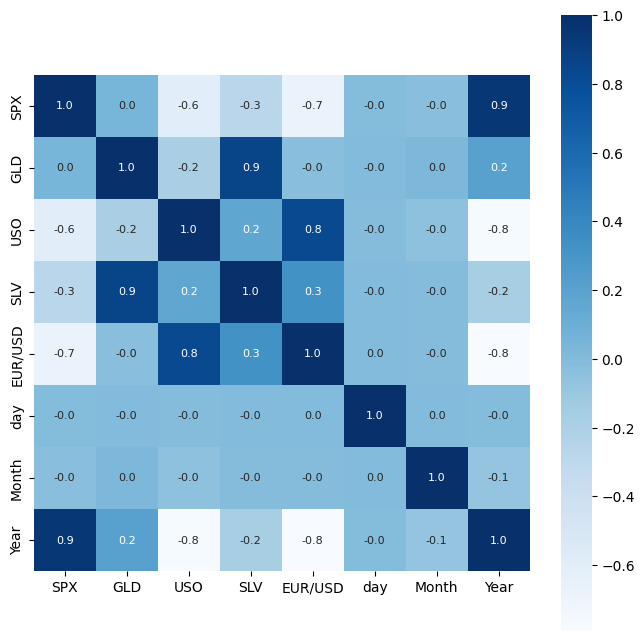

In [33]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

Insight:

“This heatmap visualizes correlations between financial indicators, highlighting silver price and currency exchange rate as key drivers of gold prices.”

In [25]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
day       -0.000198
Month      0.020494
Year       0.206654
Name: GLD, dtype: float64


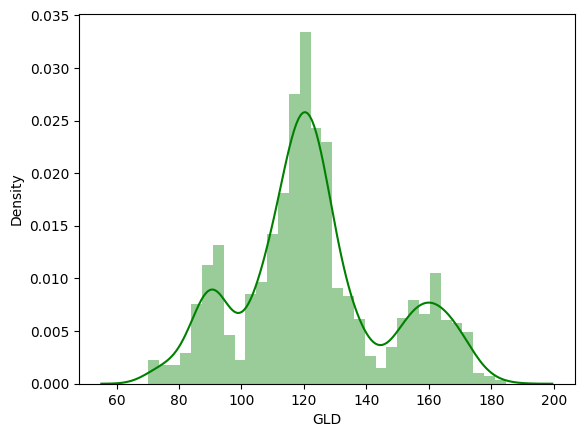

In [35]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')
plt.show()

Insight:

“The distribution plot shows that gold prices are approximately normally distributed with slight right skewness, indicating stable price behavior.”

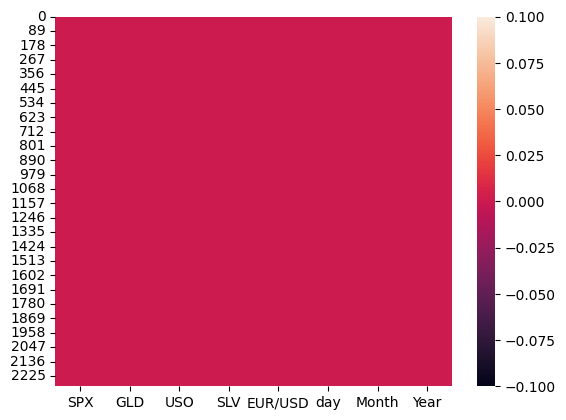

In [27]:
sns.heatmap(gold_data.isnull())
plt.show()

Insight:

The missing value heatmap confirms that the dataset has no null values, indicating good data quality.”



In [29]:
gold_data.duplicated().sum()

np.int64(0)

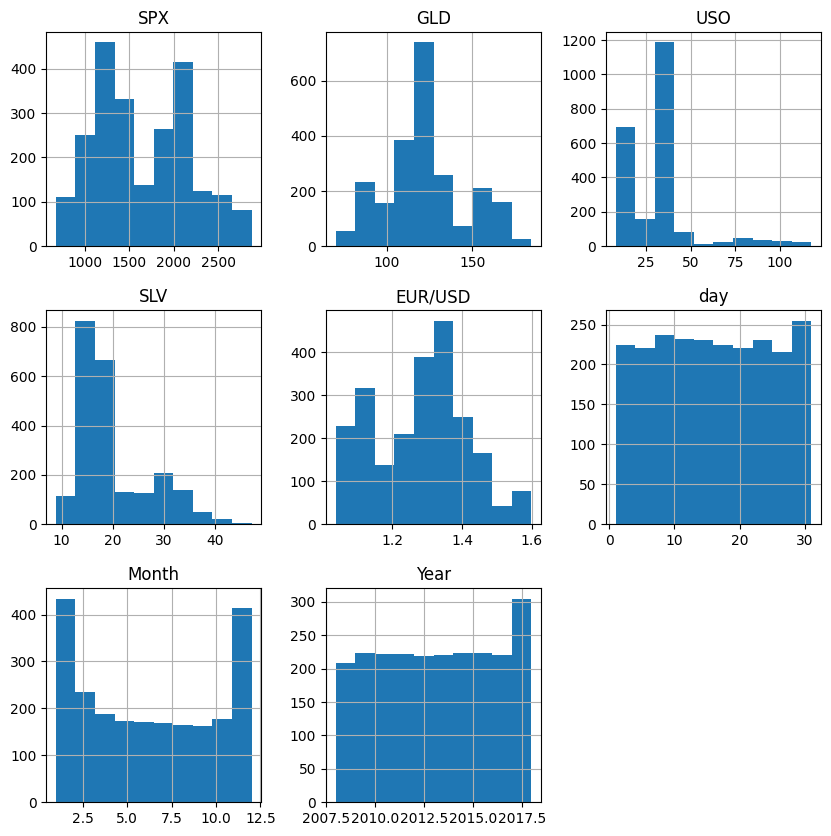

In [30]:
# Histogram of each feature
gold_data.hist(bins=10,figsize=(10,10))    
plt.show()

Insight:

The histograms illustrate feature-wise data distribution, highlighting gold’s relative stability compared to more volatile indicators like oil prices.”

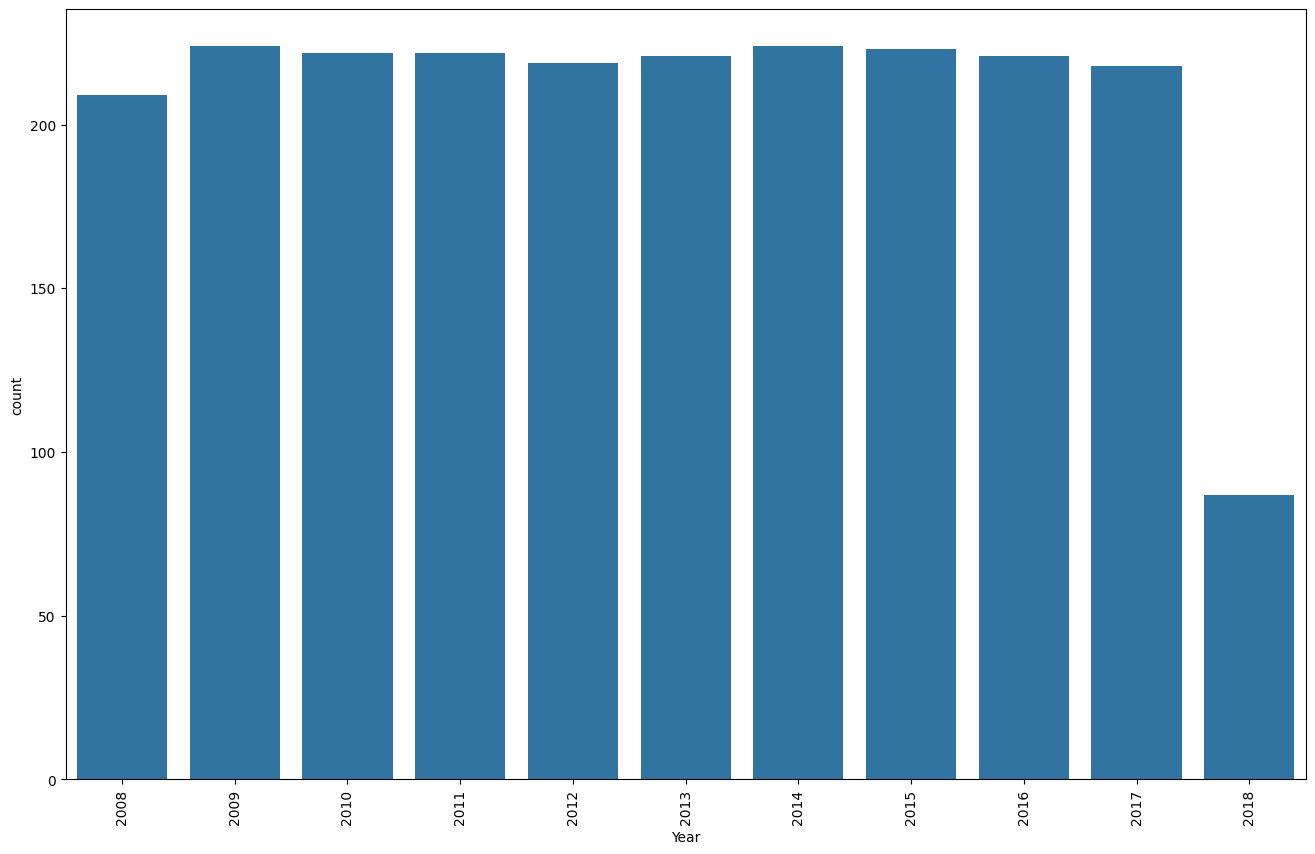

In [31]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=gold_data,x='Year')
plt.xticks(rotation=90)
plt.show()

Insight:

“The year-wise count plot confirms balanced data availability across years, ensuring unbiased time-series modeling.”

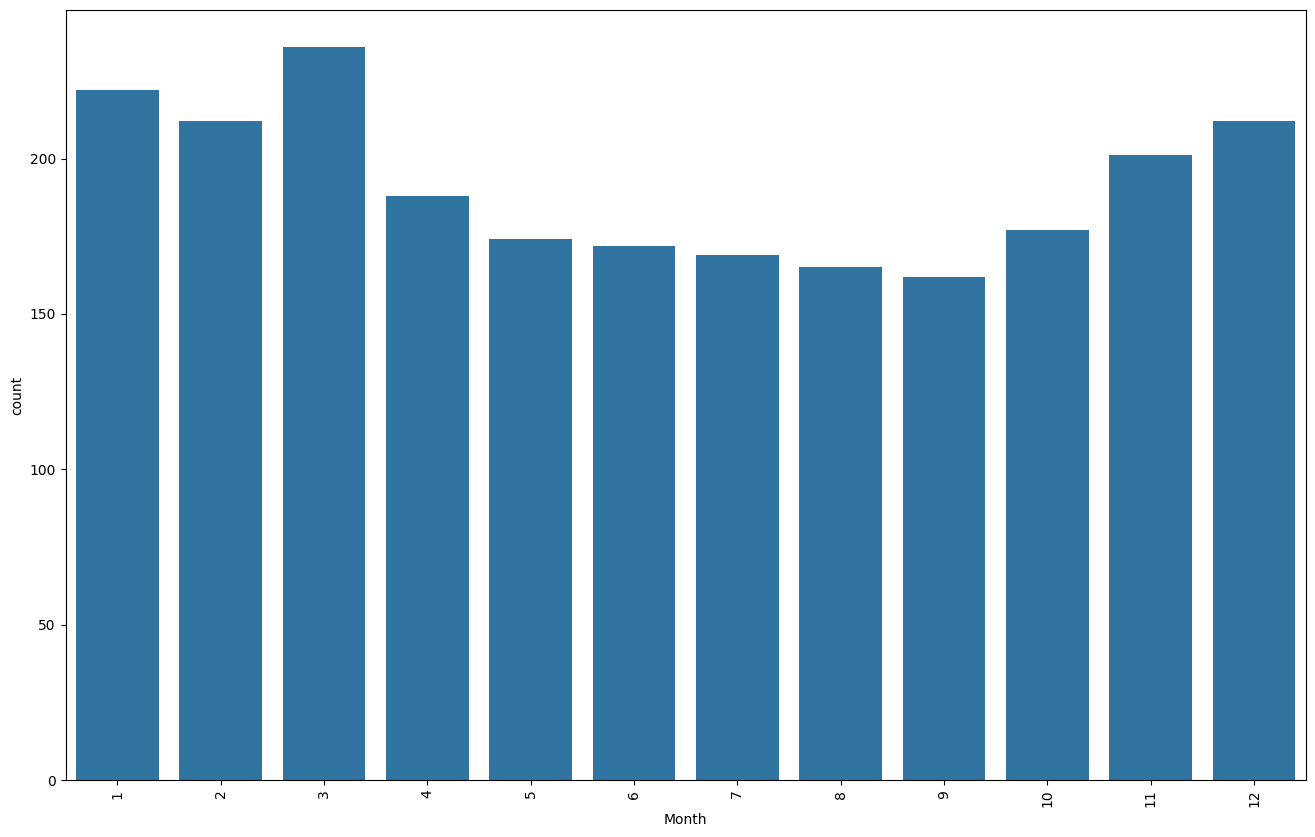

In [36]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=gold_data,x='Month')
plt.xticks(rotation=90)
plt.show()

Insight:

“The month-wise count plot shows uniform data distribution across months, supporting reliable seasonality analysis.”


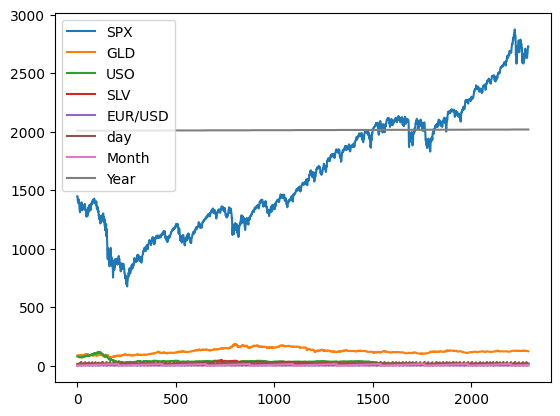

In [42]:
gold_data.plot()
plt.show()

Insight:

The plot compares trends of all financial indicators over time, showing gold’s stability and its strong alignment with silver prices.”

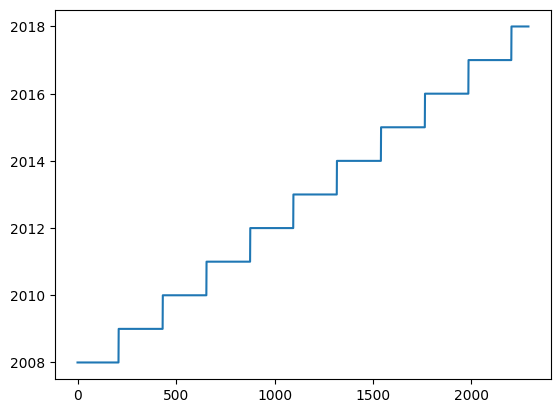

In [43]:
Year=gold_data.Year
Year.plot()
plt.show()

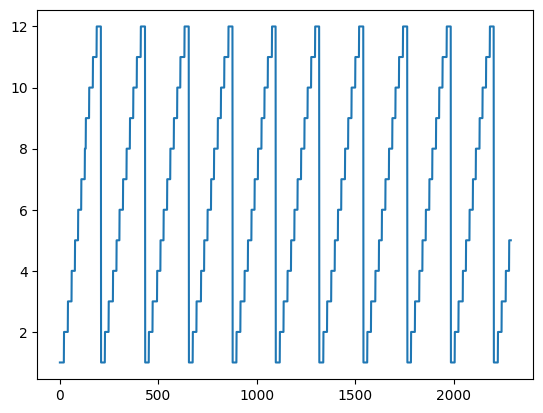

In [44]:
month=gold_data.Month
month.plot()
plt.show()

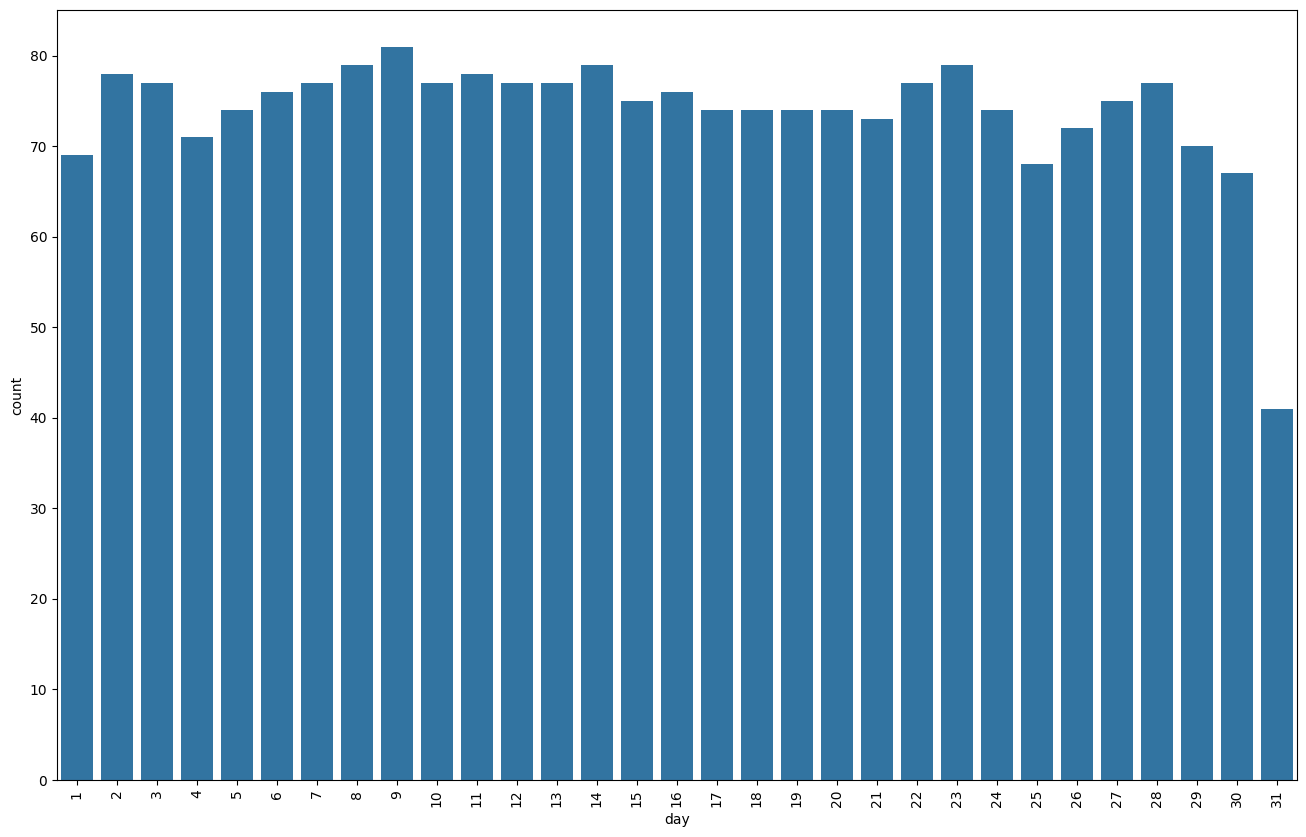

In [45]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=gold_data,x='day')
plt.xticks(rotation=90)
plt.show()

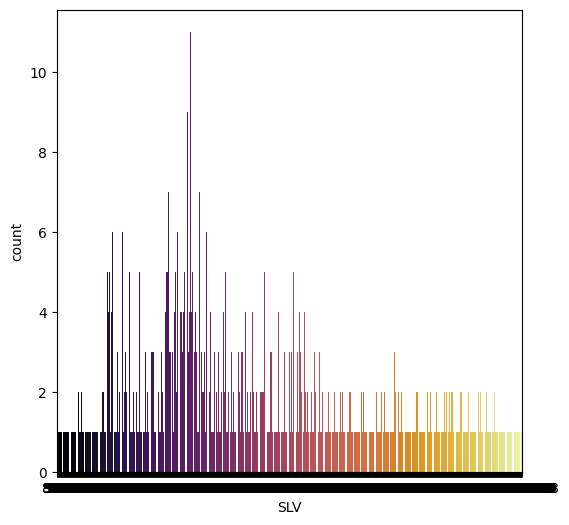

In [46]:
plt.figure(figsize = (6,6))
sns.countplot(data=gold_data,x='SLV', palette = 'inferno')
plt.show()

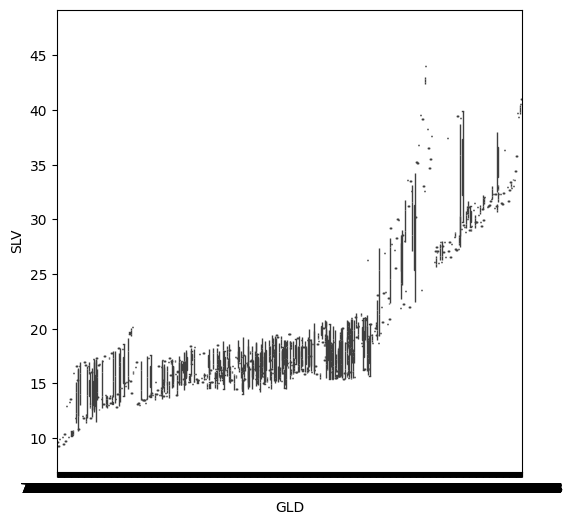

In [47]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'GLD', y = 'SLV',data = gold_data,orient='v')
plt.show()

In [48]:
gold_data.head(1)

,SPX,GLD,USO,SLV,EUR/USD,day,Month,Year
0,1447.160034,84.860001,78.470001,15.18,1.471692,2,1,2008


### Splitting the Features and Target

In [49]:
X = gold_data.drop(['GLD'],axis=1)
y = gold_data['GLD']

In [50]:
print(X)
print(y)

              SPX        USO      SLV   EUR/USD  day  Month  Year
0     1447.160034  78.470001  15.1800  1.471692    2      1  2008
1     1447.160034  78.370003  15.2850  1.474491    3      1  2008
2     1411.630005  77.309998  15.1670  1.475492    4      1  2008
3     1416.180054  75.500000  15.0530  1.468299    7      1  2008
4     1390.189941  76.059998  15.5900  1.557099    8      1  2008
...           ...        ...      ...       ...  ...    ...   ...
2285  2671.919922  14.060000  15.5100  1.186789    8      5  2018
2286  2697.790039  14.370000  15.5300  1.184722    9      5  2018
2287  2723.070068  14.410000  15.7400  1.191753   10      5  2018
2288  2730.129883  14.380000  15.5600  1.193118   14      5  2018
2289  2725.780029  14.405800  15.4542  1.182033   16      5  2018

[2290 rows x 7 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.

### Splitting into Training data and Testing Data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [52]:
print(X.shape, X_train.shape,X_test.shape)

(2290, 7) (1832, 7) (458, 7)


In [53]:
print(y.shape, y_train.shape,y_test.shape)

(2290,) (1832,) (458,)


### LinearRegression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
linreg = LinearRegression()

In [56]:
linreg.fit(X_train, y_train)

LinearRegression()

In [57]:
train_pred = linreg.predict(X_train)

In [58]:
train_pred

array([105.21076112, 121.35966468,  95.49111679, ..., 137.3881971 ,
       153.17897327, 111.16954366])

In [59]:
test_pred = linreg.predict(X_test)

In [60]:
test_pred

array([159.45210075,  85.57934697, 121.31420589, 128.88092346,
       124.60007501, 143.61030062, 161.46188815, 123.65584507,
       117.39524139, 125.95664306, 112.38092076, 176.12510374,
       135.82822746, 159.52084192, 113.81153062, 120.60450137,
       142.97421301, 160.81525815, 153.45040199, 162.62605548,
       147.60095402, 123.21958511, 180.50271568, 174.26061168,
       117.43191711,  97.75911073,  76.5952036 , 124.0669556 ,
       120.77630495, 161.32386954,  92.30629614, 121.74311436,
       100.01176188, 119.72285329, 110.57055946, 139.17690402,
       113.63723466, 118.54031472, 138.60786832, 112.16986569,
       101.13553329,  90.87240987, 122.56904643, 110.66799458,
       149.07382457, 121.78371826, 117.19659045, 114.9137796 ,
        93.6203288 , 126.24798031,  81.32053537, 112.18751729,
       125.61883858, 116.55718608, 119.40563769, 123.51214965,
       155.19562695, 179.44049224, 189.6697645 ,  87.94980796,
        90.56333106,  91.97081302,  94.3522995 , 115.73

In [61]:

# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# For scaling my data  -- 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [62]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD,day,Month,Year
0,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008


In [63]:
x=gold_data[['SPX','USO','SLV','EUR/USD']]
scaledx = scale.fit_transform(x)
print(scaledx)

[[-0.39914541  2.38880956 -0.6917197   1.42975293]
 [-0.39914541  2.38368652 -0.67691224  1.45103511]
 [-0.46760428  2.32938091 -0.69355301  1.45864621]
 ...
 [ 2.05926403 -0.89307824 -0.61274655 -0.69876145]
 [ 2.0728668  -0.89461519 -0.63813078 -0.68838269]
 [ 2.06448555 -0.89329341 -0.65305106 -0.77266741]]


In [64]:
mse_train = mean_squared_error(y_train,train_pred)
mse_train

47.259626801684746

In [65]:
mse_test = mean_squared_error(y_test,test_pred)
mse_test

55.288940851828876

In [66]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [67]:
print(rmse_test)
print(rmse_train)

7.435653357427905
6.874563753554457


In [68]:
r2_score(y_train,train_pred)*100

91.3357678633068

In [69]:
r2_score(y_test,test_pred)*100

89.51756144813316

##### linear Regression is over i got 91.33 of accuracy for training data and for testing 89.51

### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
DTR=DecisionTreeRegressor()

In [72]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [73]:
train_pred = DTR.predict(X_train)

In [74]:
train_pred

array([109.879997, 115.540001,  90.93    , ..., 129.869995, 159.429993,
       115.139999])

In [75]:
test_pred = DTR.predict(X_test)

In [76]:
test_pred

array([168.5     ,  80.93    , 115.480003, 127.550003, 119.349998,
       155.669998, 151.589996, 126.559998, 117.639999, 125.620003,
       115.110001, 174.580002, 141.919998, 167.270004, 112.580002,
       119.790001, 135.039993, 171.320007, 159.570007, 174.979996,
       155.360001, 123.599998, 173.919998, 157.320007, 124.82    ,
        94.239998,  73.080002, 118.290001, 118.589996, 167.559998,
        87.370003, 124.790001,  91.330002, 118.68    , 121.300003,
       136.050003, 114.459999, 115.800003, 134.119995, 108.589996,
       105.410004,  87.239998, 127.260002, 117.730003, 156.      ,
       120.699997, 108.419998, 107.790001,  93.800003, 127.019997,
        78.849998, 115.110001, 120.739998, 111.760002, 118.919998,
       120.739998, 159.050003, 177.720001, 146.869995,  85.199997,
        93.459999,  86.879997,  88.989998, 120.07    , 126.139999,
       127.849998, 173.020004, 122.970001, 118.099998,  97.550003,
       170.130005, 142.380005, 130.990005, 119.489998, 122.879

In [77]:
mse_train = mean_squared_error(y_train,train_pred)
mse_train

0.0

In [78]:
mse_train = mean_squared_error(y_test,test_pred)
mse_train

4.179427671923916

In [79]:
r2_score(y_train,train_pred)*100

100.0

In [80]:
r2_score(y_test,test_pred)*100

99.20760656511175

### Hyperparameters

In [81]:
# Number of trees in random Forest
criterion = ["squared_error", "friedman_mse", "absolute_error","poisson"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,20,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,50]

In [82]:
decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
RSC=RandomizedSearchCV(DTR,param_distributions=decetion_grid,cv=4,random_state=10)

In [85]:
RSC

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 11, 17],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 50],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=10)

In [86]:
RSC.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 11, 17],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 50],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=10)

In [87]:
RSC.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 11,
 'criterion': 'squared_error'}

In [88]:
DTR=DecisionTreeRegressor(criterion='squared_error',min_samples_split=10,min_samples_leaf=5,max_features='sqrt',max_depth=11)
DTR.fit(X_train,y_train)
train_pred = DTR.predict(X_train)
test_pred = DTR.predict(X_test)
mse_train = mean_squared_error(y_train,train_pred)
mse_train = mean_squared_error(y_test,test_pred)
print(r2_score(y_train,train_pred)*100)
print(r2_score(y_test,test_pred)*100)

98.64921800625577
97.91091225013103


### Feature selection Techniques

In [89]:
from sklearn.ensemble import ExtraTreesRegressor

ETR = ExtraTreesRegressor()
ETR.fit(X,y)

ExtraTreesRegressor()

In [90]:
print(ETR.feature_importances_)

[0.07778506 0.03951521 0.61120871 0.02105627 0.00112681 0.02756503
 0.22174292]


In [91]:
F_imp=pd.Series(ETR.feature_importances_,index=X.columns)

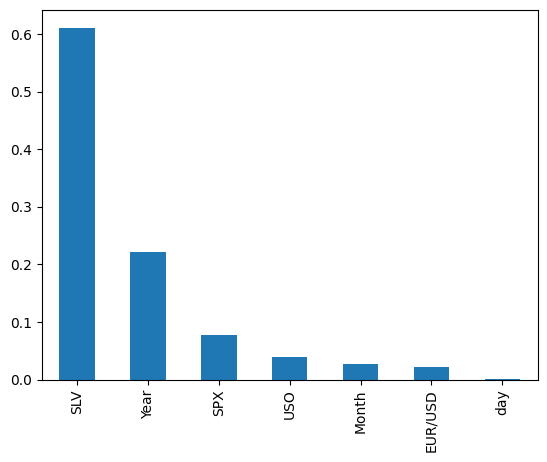

In [92]:
F_imp.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [93]:
X_imp = X[F_imp.nlargest(6).index]
X_imp

,SLV,Year,SPX,USO,Month,EUR/USD
0,15.1800,2008,1447.160034,78.470001,1,1.471692
1,15.2850,2008,1447.160034,78.370003,1,1.474491
2,15.1670,2008,1411.630005,77.309998,1,1.475492
3,15.0530,2008,1416.180054,75.500000,1,1.468299
4,15.5900,2008,1390.189941,76.059998,1,1.557099
...,...,...,...,...,...,...
2285,15.5100,2018,2671.919922,14.060000,5,1.186789
2286,15.5300,2018,2697.790039,14.370000,5,1.184722
2287,15.7400,2018,2723.070068,14.410000,5,1.191753
2288,15.5600,2018,2730.129883,14.380000,5,1.193118


In [94]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [95]:
DTR=DecisionTreeRegressor(criterion='squared_error',min_samples_split=10,min_samples_leaf=5,max_features='sqrt',max_depth=11)
DTR.fit(X_train,y_train)
train_pred = DTR.predict(X_train)
test_pred = DTR.predict(X_test)
mse_train = mean_squared_error(y_train,train_pred)
mse_train = mean_squared_error(y_test,test_pred)
print(r2_score(y_train,train_pred)*100)
print(r2_score(y_test,test_pred)*100)

99.25265152149541
97.83442956566395


I have did decision Tree then I got accuray for Train and test(100.0 and 99.20) However

I need to find Hyper tuning parameters accuracy for train and test(98.64 and 97.91) Then

I wanted to do Feature selection technic accuracy for Train and test(99.25 and 97.83)

from this three techniques i want take Feature selection techniques beacause It Has gives me the best accuracy for my data

### Hyperparameters

### Model Training: Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [98]:
RFR=RandomForestRegressor()

In [99]:
RFR.fit(X_train,y_train)
train_pred = RFR.predict(X_train)
test_pred = RFR.predict(X_test)
mse_train = mean_squared_error(y_train,train_pred)
mse_train = mean_squared_error(y_test,test_pred)
print(r2_score(y_train,train_pred)*100)
print(r2_score(y_test,test_pred)*100)

99.94019228215129
99.51351559953142


In [100]:
# Number of trees in random Forest
criterion = ["squared_error", "friedman_mse", "absolute_error","poisson"]
# Number of features to consider at every split
max_features = [ "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,20,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,50]

In [101]:
decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [102]:
RSC=RandomizedSearchCV(RFR,param_distributions=decetion_grid,cv=4,random_state=10)

In [103]:
RSC.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 11, 17],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 50],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=10)

In [104]:
RSC.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 17,
 'criterion': 'squared_error'}

In [105]:
RFR=RandomForestRegressor(criterion='squared_error',max_features='log2',min_samples_leaf=1,min_samples_split=10,max_depth=17)
RFR.fit(X_train,y_train)
train_pred = RFR.predict(X_train)
test_pred = RFR.predict(X_test)
mse_train = mean_squared_error(y_train,train_pred)
mse_train = mean_squared_error(y_test,test_pred)
print(r2_score(y_train,train_pred)*100)
print(r2_score(y_test,test_pred)*100)

99.74476669720882
99.36864318088831


### Feature selection Techniques

In [106]:
ETR = ExtraTreesRegressor()
ETR.fit(X,y)

ExtraTreesRegressor()

In [107]:
print(ETR.feature_importances_)

[0.07703799 0.054661   0.55502722 0.02774216 0.00110204 0.02893032
 0.25549928]


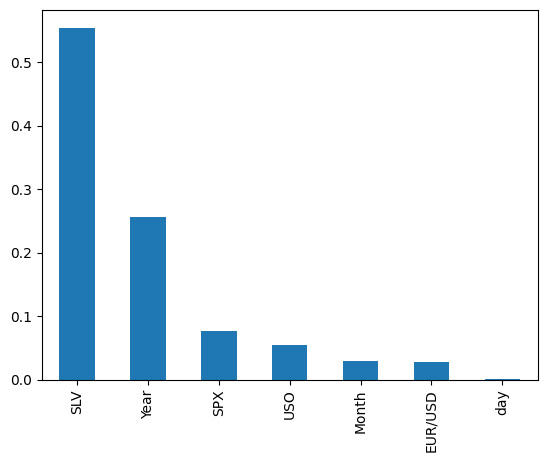

In [108]:
F_imp=pd.Series(ETR.feature_importances_,index=X.columns)
F_imp.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [109]:
X_imp = X[F_imp.nlargest(6).index]
X_imp

,SLV,Year,SPX,USO,Month,EUR/USD
0,15.1800,2008,1447.160034,78.470001,1,1.471692
1,15.2850,2008,1447.160034,78.370003,1,1.474491
2,15.1670,2008,1411.630005,77.309998,1,1.475492
3,15.0530,2008,1416.180054,75.500000,1,1.468299
4,15.5900,2008,1390.189941,76.059998,1,1.557099
...,...,...,...,...,...,...
2285,15.5100,2018,2671.919922,14.060000,5,1.186789
2286,15.5300,2018,2697.790039,14.370000,5,1.184722
2287,15.7400,2018,2723.070068,14.410000,5,1.191753
2288,15.5600,2018,2730.129883,14.380000,5,1.193118


In [110]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [111]:
RFR=RandomForestRegressor(criterion='squared_error',max_features='log2',min_samples_leaf=1,min_samples_split=10,max_depth=17)
RFR.fit(X_train,y_train)
train_pred = RFR.predict(X_train)
test_pred = RFR.predict(X_test)
mse_train = mean_squared_error(y_train,train_pred)
mse_train = mean_squared_error(y_test,test_pred)
print(r2_score(y_train,train_pred)*100)
print(r2_score(y_test,test_pred)*100)

99.76971525039883
99.40355628463433


I have did random forset regressor then I got accuracy for Train and test(99.94 and 99.51) However

I need to find Hyper tuning parameters accuracy for train and test(99.74 and 99.36)

I wanted to do Feature techniques accuracy for Train and test(99.74 and 99.40)

For three techniques i want take Feature techniques beacause It gives me best accuracy for my data.

### CONCLUSION
The Linear Regression model achieved an accuracy of 91.33 on the training data and 89.51% on the test data.

The Decision Tree model yielded high accuracy levels with 99.25% on the training data and 97.83% on the test data.

The Random Forest model obtained respectable accuracies of 99.74% on the training data and 99.40% on the test data.

In conclusion, the Random Forest model provides the best accuracy results, with a high testing accuracy of 99.74% for training and for testing 99.40%. This suggests that the Random Forest model is more likely to perform well on new, unseen data and is the most suitable choice among the three models for this specific problem.

In [112]:
models = ["Linear Regression Train", "Linear Regression test", "Decision Tree Train", "Decision Tree Test","Random Forest Train","Random Forest Test"]
accuracy_list = [91.33, 89.51, 99.25,97.83, 99.74,99.40]

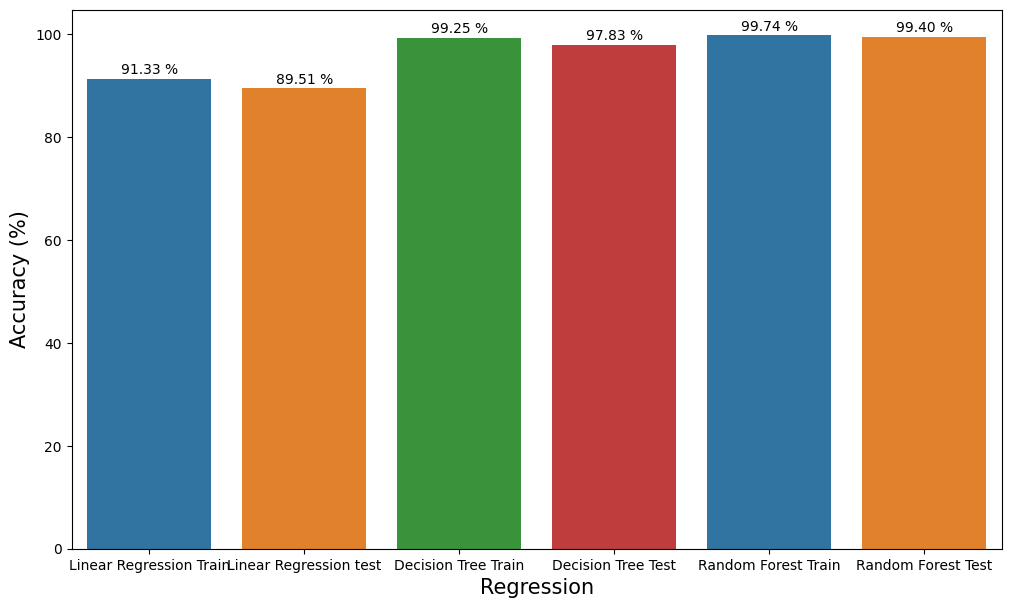

In [115]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(12,7))
ax = sns.barplot(x=models, y=accuracy_list, palette=colors)

plt.xlabel("Regression", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f} %",
        (p.get_x() + p.get_width()/2, p.get_height()*1.01),
        ha="center"
    )

plt.show()
